In [4]:
import re
import tweepy
import pickle
from tweepy import OAuthHandler

In [2]:
consumer_key = '9SU559PhqH9lDUQA6mO25NYw0'
consumer_secret = 'kZGfQOVORbkWPef17hTKKyj6GEbzVZjgLHnYCW2Ch1EsQKF9bU'
access_token = '1260631603216179200-qucbLsh0ZNRNLef8FaKuhpk01szWGi'
access_secret = 'aQQATLr7JK9gxH11K119LhwDAhFWVkulovj2VALfGDtMr'

In [5]:
auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
args = ['facebook']
api = tweepy.API(auth,timeout=10)

In [6]:
list_tweets = []
query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+' -filter:retweets',lang='en',result_type='recent').items(100):
        list_tweets.append(status.text)

In [8]:
with open('tfidfmodel.pickle','rb') as f:
    vectorizer = pickle.load(f)

In [9]:
with open('classifier.pickle','rb') as f:
    classifier = pickle.load(f)

In [15]:
positive_tweets = 0
negative_tweets = 0

for tweet in list_tweets:
    tweet = re.sub(r'^http://t.co/[a-zA-Z0-9]*\s',' ',tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*\s',' ',tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*$',' ',tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"whats's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"i'll","i will",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    
    sentiment = classifier.predict(vectorizer.transform([tweet]).toarray())
    
    if sentiment[0] == 1:
        positive_tweets += 1
    else:
        negative_tweets += 1

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
classes = ['Positive', 'Negative']
y_pos = np.arange(len(classes))

Text(0.5, 1.0, 'Total Number of Positive And Negative Tweets')

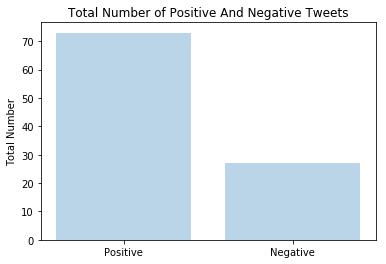

In [19]:
plt.bar(y_pos,[positive_tweets,negative_tweets],alpha=0.3)
plt.xticks(y_pos,classes)
plt.ylabel('Total Number')
plt.title('Total Number of Positive And Negative Tweets')